## Python+Pandas 读取Oracle数据库

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import cx_Oracle as oracle

In [2]:
conn = oracle.connect('NNSCUSER','NNSCUSER','192.168.1.171/orcl')

In [3]:
conn.version

'11.2.0.1.0'

In [4]:
cur = conn.cursor()

In [5]:
sql="select table_name from all_tables where owner='NNSCUSER'"

In [6]:
cur.execute(sql)

<cx_Oracle.Cursor on <cx_Oracle.Connection to NNSCUSER@192.168.1.171/orcl>>

In [7]:
ret = cur.fetchall()

In [25]:
table_name = pd.read_sql(sql, conn)
table_name

,TABLE_NAME
0,CMP3$97678
1,MT_CF_PAGEQUERY
2,MT_CF_QUERYCHART
3,MT_CF_QUERYCOLUMNALARM
4,MT_CF_QUERYCOLUMNS
5,MT_CF_QUERYFUNCTION
6,MT_CF_QUERYSINGCHART
7,MT_DC_CONVEYANCE_PRODUCTION
8,MT_DC_PB_CONVEYCONDUIT
9,MT_DC_PB_CONVEYCONDUIT_RECORD


### 以下为131个表中的数据：

In [28]:
table_list = []
for tn in table_name['TABLE_NAME']:
    sql = 'select * from ' + tn
    tn = pd.read_sql(sql, conn)
    table_list.append(tn)

In [51]:
table_list[0]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,MACHINESPEED,TOTALPRODUCTION
0,2016-04-11,1,107,1,10001586,2016-04-11 10:17:38,0,0
1,2016-04-11,1,120,1,10001586,2016-04-11 10:17:38,0,0
2,2016-04-11,1,104,1,10001586,2016-04-11 10:17:55,2499,0
3,2016-04-11,1,108,1,10001586,2016-04-11 10:18:01,0,0
4,2016-04-11,1,119,1,10001586,2016-04-11 10:18:08,2,0
5,2016-04-11,1,107,1,10001586,2016-04-11 10:18:39,0,0
6,2016-04-11,1,120,1,10001586,2016-04-11 10:18:39,0,0
7,2016-04-11,1,104,1,10001586,2016-04-11 10:18:56,2499,0
8,2016-04-11,1,108,1,10001586,2016-04-11 10:19:02,0,0
9,2016-04-11,1,119,1,10001586,2016-04-11 10:19:09,15,0


In [52]:
table_list[1]

,QUERYPAGECODE,QUERYPAGENAME,FUNCODE,ORDERNUMBER,SQLTEXT,ISVALID,CURSQLTEXT,AUTOCOLUMNWITH
0,10038,??/????,10005,7,"SELECT T.PRODUCTNAME,T.PRODUCTSHORTNAME,T.STOP...",1,"SELECT T.PRODUCTNAME,T.PRODUCTSHORTNAME,T.STOP...",1
1,10001,??????,10001,1,select * from mv_dc_pm_mp_pt102data t where 1...,1,select * from mv_dc_pm_mp_pt102data_cur t whe...,1
2,10002,????,10001,2,"SELECT T.PM_MP_MACHINE_ID, T.MACHINESHOR...",1,"SELECT T.PM_MP_MACHINE_ID, T.MACHINESHOR...",1
3,10003,????,10001,3,"SELECT T.PB_PRODUCT_ID, T.PRODUCTNAME,t....",1,"SELECT T.PB_PRODUCT_ID, T.PRODUCTNAME,t....",1
4,10004,??/????,10001,4,"SELECT T.PM_MP_MACHINE_ID,T.MACHINESHORTNAME,T...",1,"SELECT T.PM_MP_MACHINE_ID,T.MACHINESHORTNAME,T...",1
5,10005,??????,10001,5,"SELECT T.PRODUCEDATE, SUM(T.TOTALPRODUCT...",1,"SELECT T.PRODUCEDATE, SUM(T.TOTALPRODUCT...",1
6,10064,xzxzxz,10009,9,select * from mv_dc_prev2shift_view t,1,select * from mv_dc_prev2shift_view t,1
7,10006,??????,10001,6,"SELECT to_char(to_date(T.PRODUCEDATE,'yyyy-mm-...",1,"SELECT to_char(to_date(T.PRODUCEDATE,'yyyy-mm-...",1
8,10007,??????,10004,1,select * from mv_dc_pm_mp_gd102data t where 1...,1,select * from mv_dc_pm_mp_gd102data_cur t whe...,1
9,10008,????,10004,2,"SELECT T.PM_MP_MACHINE_ID, T.MACHINESHOR...",1,"SELECT T.PM_MP_MACHINE_ID, T.MACHINESHOR...",1


In [53]:
table_list[2]

,CHARTCODE,CHARTNAME,QUERYPAGECODE,HCOLUMNNAME,VCOLUMNNAME,CHARTTYPE,ISVALID,SHOWAVG
0,10001,??????,10002,MACHINESHORTNAME,TOTALPRODUCTION,1,1,1
1,10002,??????,10002,MACHINESHORTNAME,TOTALWASTE,2,1,0
2,10003,??????,10003,PRODUCTNAME,TOTALPRODUCTION,1,1,1
3,10004,??????,10003,PRODUCTNAME,TOTALWASTE,2,1,0
4,10007,??????,10005,PRODUCEDATE,TOTALPRODUCTION,1,1,1
5,10008,??????,10005,PRODUCEDATE,TOTALWASTE,2,1,0
6,10009,??????,10006,MONTH,TOTALPRODUCTION,1,1,1
7,10010,??????,10006,MONTH,TOTALWASTE,2,1,0
8,10011,??????,10008,MACHINESHORTNAME,TOTALPRODUCTION,1,1,1
9,10012,??????,10008,MACHINESHORTNAME,TOTALWASTE,2,1,0


In [54]:
table_list[3]

,ALARM_CODE,FUNCTIONCOLUMNCODE,ALARMNAME,COMPAREEXP,OBJECTVALUE1,OBJECTVALUE2,APPROW,ISVISIBLE,ARGBCOLOR,COLORTYPE
0,4,10090,???1,Between,65,80.00,1,1,"255,177,94",1
1,5,10090,???2,Greater,79,None,0,1,"95,252,0",1
2,6,10090,???3,Less,65,None,0,1,"255,0,0",1
3,1,10028,???1,Between,65.00,80.00,1,1,"255,177,94",1
4,2,10028,???2,Greater,80,None,0,1,"95,252,0",1
5,3,10028,???2,Less,65,None,0,1,"255,0,0",1
6,7,10027,??(?),Less,45,None,0,1,"204,232,20",1


In [55]:
table_list[4]

,FUNCTIONCOLUMNCODE,QUERYPAGECODE,FUNCTIONCOLUMNNAME,COLUMNCAPTIONNAME,COLUMNALLOWEDIT,HEADERHALIGNMENT,COLUMNSUMMARYTYPE,COLUMNSUMMARYFORMAT,COLUMNDISPLAYFORMAT,COLUMNALLOWFILTER,COLUMNWIDTH,COLUMNSIDISPLAY,ISVISIBLE,ISX,ORDERNUMBER
0,10039,10003,PRODUCTNAME,????,0,center,count,?{0}?,None,0,0,1,1,0,1
1,10038,10001,PLANPRODUCTION,????,0,center,sum,None,None,0,0,1,1,0,31
2,10040,10003,TOTALPRODUCTION,??(?),0,center,sum,None,None,0,0,1,1,0,5
3,10041,10003,FILTERTIP,??(??),0,center,sum,None,None,0,0,1,1,0,11
4,10042,10003,PAPER,??(?),0,center,sum,None,None,0,0,1,1,0,13
5,10043,10003,WPAPER,???(?),0,center,sum,None,None,0,0,1,1,0,15
6,10044,10003,TOTALWASTE,???(?),0,center,sum,None,None,0,0,1,1,0,17
7,10045,10003,TOTALWASTEPCT,???(%),0,center,None,None,None,0,0,1,1,0,19
8,10046,10003,RUNTIME,????(?),0,center,sum,None,None,0,0,1,1,0,21
9,10047,10003,TOTALSTOPTIME,????(?),0,center,sum,None,None,0,0,1,1,0,23


In [56]:
table_list[5]

,FUNCODE,PM_MP_MACHINECLASS_ID,SHOWPRODUCT,ISVALID,FUNNAME,QUERYCONTROLTYPE,PRODUCTTYPE
0,10020,1,1,1,??????,1,1
1,10020,1,1,1,??????,1,1
2,10020,1,1,1,??????,1,1


In [57]:
table_list[6]

,CHARTCODE,CHARTNAME,CHARTTITLE,CHARTTYPE,QUERYCONTROLTYPE,PM_MP_MACHINECLASS_ID,SHOWPRODUCT,CURSQLTEXT,SQLTEXT,SHOWAVG,HCOLUMNNAME,VCOLUMNNAME,CHARTUNIT,SHOWVALUE
0,10029,?????-???(%),???(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
1,10030,?????-????(%),????(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
2,10031,?????-SRM??(%),SRM??(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
3,10032,?????-????(%),????(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
4,10033,?????-??(%),??(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
5,10034,?????-??(%),??(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
6,10035,?????-???(%),???(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
7,10036,?????-????(%),????(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
8,10037,?????-???(%),???(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1
9,10038,?????-????(%),????(%),3,3,1,0,None,"SELECT TO_CHAR(TO_DATE(T.GATHERDATETIME, 'YYYY...",1,GATHERDATETIME,VALUE_CUR,%,1


In [58]:
table_list[7]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_FILTERPRODUCT_ID,GATHERDATETIME,PRODUCTION,STATUSCODE,STOPCNT,STOPTIME,GATHERTYPE,BATCH,INSERTTIME,REJECTPRODUCTION,PLANCODE,PRODUCTID,PRODUCTNAME
0,2016-09-20,1,504,1,1,2016-09-20 15:56:20,1734336,0,0,28647,E,None,None,None,None,None,None
1,2016-09-20,1,505,1,1,2016-09-20 15:56:21,2398762,0,0,28647,E,None,None,None,None,None,None
2,2016-09-20,1,506,1,1,2016-09-20 15:56:21,2557909,0,0,28647,E,None,None,None,None,None,None
3,2016-09-20,1,507,1,1,2016-09-20 15:56:21,1477332,0,0,28647,E,None,None,None,None,None,None
4,2016-09-20,1,508,1,1,2016-09-20 15:56:22,0,0,0,28647,E,None,None,None,None,None,None
5,2016-09-20,1,509,1,1,2016-09-20 15:56:22,0,0,0,28647,E,None,None,None,None,None,None
6,2016-09-20,1,510,1,1,2016-09-20 15:56:23,0,0,0,28647,E,None,None,None,None,None,None
7,2016-09-20,1,501,1,1,2016-09-20 15:56:20,0,0,0,11751,E,None,None,None,None,None,None
8,2016-09-20,1,502,1,1,2016-09-20 15:56:20,0,0,0,11751,E,None,None,None,None,None,None
9,2016-09-20,1,503,1,1,2016-09-20 15:56:20,0,0,0,11751,E,None,None,None,None,None,None


In [59]:
table_list[8]

,PM_MP_CONVEYCONDUIT_ID,CONDUITNAME,PM_MP_MACHINE_ID_RC,PM_MP_MACHINE_ID_PT


In [60]:
table_list[9]

,CONVEYCONDUIT_RECORD_ID,PM_MP_CONVEYCONDUIT_ID,PM_MP_MACHINE_ID_PT_OLD,PM_MP_MACHINE_ID_PT_NEW,RECORDDATE,COMMENTS,USERID,PM_MP_MACHINE_ID_RC,MACHINESHORTNAME_OLD,MACHINESHORTNAME_NEW,CONDUITNAME,PM_MP_MACHINE_ID_RCNAME,USERNAME


In [61]:
table_list[10]

,PM_MP_CONVEYPIPELINE_ID,PIPELINENAME,PM_MP_MACHINE_ID_FS,PM_MP_MACHINE_ID_PT


In [62]:
table_list[11]

,CONVEYPIPELINE_RECORD_ID,PM_MP_CONVEYPIPELINE_ID,PM_MP_MACHINE_ID_PT_OLD,PM_MP_MACHINE_ID_PT_NEW,RECORDDATE,COMMENTS,USERID,PM_MP_MACHINE_ID_FS,MACHINESHORTNAME_OLD,MACHINESHORTNAME_NEW,PIPELINENAME,PM_MP_MACHINE_ID_FSNAME,USERNAME


In [63]:
table_list[12]

,PM_PB_EMPLOYEEITEMGROUPID,INFOITEMCODE,INFOITEMNAME,INFOITEMGROUPCODE


In [64]:
table_list[13]

,DC_PB_MACHINEAREAID,AREA_CODE,AREA_NAME
0,0,0,??0
1,3,3,??1
2,1,1,???
3,2,2,???


In [65]:
table_list[14]

,DC_PB_MACHINEGROUPID,MACHINEGROUP_CODE,MACHINEGROUP_NAME
0,1,1,X#????
1,2,2,Z#????
2,3,3,14#????
3,4,4,14#????
4,5,5,14#????
5,6,6,14#????
6,7,7,14#????
7,8,8,14#????
8,9,9,14#????
9,10,10,14#????


In [66]:
table_list[15]

,DC_PB_PARAMCODEID,SHORTNAME,FULLNAME,COMPANYCODE,ISVALID
0,122001,??,??,122001,1
1,122002,????,????,122002,1
2,122004,????,????,122004,1
3,122005,??????,??????,122005,1
4,122006,????,????,122006,1
5,122007,??????,??????,122007,1
6,122008,??????,??????,122008,1
7,122016,????,????,122016,1
8,122019,????????,????????,122019,1
9,122020,???????(??),???????(??),122020,1


In [67]:
table_list[16]

,PM_MP_MACHINE_ID_GD,PM_MP_MACHINE_ID_YP11


In [68]:
table_list[17]

,RAILROUT_RECORD_ID,PM_MP_RAILROUT_ID,RAILROUTNAME,PM_MP_MACHINE_ID_YP11_OLD,MACHINESHORTNAME_YP11_OLD,PM_MP_MACHINE_ID_YP11_NEW,MACHINESHORTNAME_YP11_NEW,RECORDDATE,COMMENTS,PM_MP_MACHINE_ID_GD,PM_MP_MACHINE_ID_GDNAME,USERID,USERNAME


In [69]:
table_list[18]

,PM_MP_REJECTCODE_ID,PM_MP_MACHINETYPE_ID,PM_MP_REJECTTYPE_ID,REJECTNAME,COMPANYCODE,ISVALID,ISREJECT
0,9000007,9,0,?????????,9000007,1,1
1,9000008,9,0,?????????????,9000008,1,1
2,9000009,9,0,???????,9000009,1,1
3,9000010,9,0,????????????,9000010,1,1
4,9000011,9,0,????????????,9000011,1,1
5,9000012,9,0,?????3????????,9000012,1,1
6,9000013,9,0,?????3????????,9000013,1,1
7,9000014,9,0,?????3????????,9000014,1,1
8,9000016,9,0,?????3????????,9000016,1,1
9,9000017,9,0,?????????,9000017,1,1


In [70]:
table_list[19]

,PM_MP_REJECTTYPE_ID,REJECTTYPENO,REJECTTYPESHORTNAME,REJECTTYPENAME,ISVALID
0,30,10,350????,350????,1
1,31,11,401????,401????,1
2,32,12,408????,408????,1
3,40,20,B1????,B1????,1
4,41,21,RC????,RC????,1
5,8,1,??????,??????,1


In [71]:
table_list[20]

,PM_MP_REQUESTCODE_ID,PM_MP_MACHINECLASS_ID,REQUESTNAME,ISVALID
0,8,1,????,1
1,1,1,????,1
2,2,1,????,1
3,3,1,????,1
4,4,1,??????,1
5,5,1,??,1
6,6,1,??,1
7,7,1,?????,1


In [72]:
table_list[21]

,STATUSCODE,STATUSNAME,ISVALID,NOTES,COLORVAL,COLORDESC,CONTROLSTATUSCODE
0,11,??,1,None,none.png,None,11
1,0,??,1,None,run.png,None,0
2,1,??,1,None,stop.png,None,1
3,2,???,1,None,none.png,None,2
4,3,????,1,None,empty.png,None,3
5,4,??,1,None,out.png,None,4
6,5,??,1,None,enter.png,None,5
7,6,????,1,None,malfunction.png,None,6
8,7,??,1,None,service.png,None,7
9,8,????,1,None,warn.png,None,8


In [73]:
table_list[22]

,PM_MP_STOPCODE_ID,PM_MP_MACHINETYPE_ID,STOPNAME,COMPANYCODE,ISVALID
0,9001068,9,OUTPUT DIAGN: N25 24 5K141,9001068,1
1,9001069,9,INPUT DIAGN: N06 23 5S573,9001069,1
2,9001070,9,INPUT DIAGN: N06 24 5S572,9001070,1
3,9001071,9,OUTPUT DIAGN: N25 32 5H573,9001071,1
4,9001072,9,OUTPUT DIAGN: N25 31 5H572,9001072,1
5,9001073,9,INPUT DIAGN:N06 25 5S571,9001073,1
6,9001074,9,INPUT DIAGN:N06 14 5K144,9001074,1
7,9001075,9,????????,9001075,1
8,9001076,9,????????,9001076,1
9,9001077,9,OUTPUT DIAGN: N25 30 5K642,9001077,1


In [74]:
table_list[23]

,DC_PB_WASTECODEID,SHORTNAME,FULLNAME,COMPANYCODE,ISVALID
0,104101,??,??,104101,0
1,104102,??,??,104102,0
2,104103,??,??,104103,0
3,104104,??,??,104104,0
4,104105,????,????,104105,0
5,104106,???,???,104106,0
6,104107,???,???,104107,0
7,104108,????,????,104108,0
8,104109,SRM??,SRM??,104109,0
9,104110,????,????,104110,0


In [75]:
table_list[24]

,DC_PB_WEIGHT_CODEID,SHORTNAME,FULLNAME,COMPANYCODE,ISVALID
0,103013,? ? ? ?,? ? ? ? (mm),103013,1
1,103014,???????,???????,103014,1
2,103015,???????,???????,103015,1
3,103009,????,????,103009,1
4,103008,????,????,103008,1
5,103010,????,????,103010,1
6,103011,????,????,103011,1
7,103012,????,????(%),103012,1
8,103001,????(mg),????(mg),103001,1
9,103002,????(mg),????(mg),103002,1


In [76]:
table_list[25]

,REASONCODE,REASON,COMPANYCODE,ISVALID,ISFAULT
0,0008,????,None,1,0
1,0009,??,None,1,0
2,0001,??,None,1,0
3,0002,???,None,1,0
4,0003,??,None,1,0
5,0004,????,None,1,0
6,0005,??,None,1,0
7,0006,??,None,1,0
8,0010,??,None,1,0
9,0013,????,None,1,0


In [77]:
table_list[26]

,PM_MP_CHANGEBRAND_ID,PRODUCEDATE,STATUSFLAG,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,SHORTNAME,PLANCHANGEBRANDDATETIME,SETDATETIME,SENDNO,SENDDATETIME,PB_PRODUCT_IDNOW,USERID,REMARK,PLAN_STP_NUM


In [78]:
table_list[27]

,PM_MP_CHANGEBRAND_ID,PRODUCEDATE,STATUSFLAG,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,SHORTNAME,PLANCHANGEBRANDDATETIME,SETDATETIME,SENDNO,SENDDATETIME,PB_PRODUCT_IDNOW,USERID,REMARK,PLAN_STP_NUM,CHANGEBRAND_TYPE


In [79]:
table_list[28]

,PM_MP_MACHINE_ID,PRODUCEDATE,PB_SHIFT_ID,PB_PRODUCT_ID,ENTRYID,BRANDDESC,PLANNINGSTARTTIME,PLANNINGFINISHEDTIME,OUTMATERIALQUANTITY


In [80]:
table_list[29]

,PM_MP_CHANGETASK_ID,PRODUCEDATE,STATUSFLAG,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,SHORTNAME,CHANGETASKDATETIME,PLAN_START_DATETIME,PLAN_END_DATETIME,PLAN_QUANTTY,USERID,REMARK,JBPLANID


In [81]:
table_list[30]

,FILETYPEID,FILETYPENAME,ISVALID
0,3,CRAFT.TXT,0
1,2,SYSTEM.CMD,0
2,1,NOTE.TXT,1


In [82]:
table_list[31]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PM_MP_MACHINEPART_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,PRODUCTIONSTARTTIME,POWEROFFTIME,PREPARATIONTIME,...,MACHINESPEED,NORMALSPEED,BARPRODUCTION,GATHERTYPE,MODIFYPRODUCTION,INSERTTIME,BATCH,PLANCODE,PRODUCTID,PRODUCTNAME
0,2015-11-11,3,202,1,1,10001586,2015-11-12 07:20:04,0:0,0,0,...,0,400,0,E,126910,2015-11-12 00:00:36,None,None,None,None
1,2015-11-11,3,202,2,1,10001586,2015-11-12 07:20:04,0:0,0,0,...,0,380,0,E,126932,2015-11-12 00:00:36,None,None,None,None
2,2015-11-11,3,215,1,1,10001586,2015-11-12 07:20:01,0:0,0,0,...,0,400,0,E,124130,2015-11-12 00:00:37,None,None,None,None
3,2015-11-11,3,215,2,1,10001586,2015-11-12 07:20:02,0:0,0,0,...,0,380,0,E,123815,2015-11-12 00:00:38,None,None,None,None
4,2015-11-11,3,220,1,1,10001586,2015-11-12 07:20:04,0:0,0,0,...,0,400,0,E,113730,2015-11-12 00:00:38,None,None,None,None
5,2015-11-11,3,220,2,1,10001586,2015-11-12 07:20:04,0:0,0,0,...,0,380,0,E,113740,2015-11-12 00:00:38,None,None,None,None
6,2015-11-11,3,219,1,1,10001586,2015-11-12 07:20:06,0:0,0,0,...,0,400,0,E,106750,2015-11-12 00:00:41,None,None,None,None
7,2015-11-11,3,219,2,1,10001586,2015-11-12 07:20:06,0:0,0,0,...,0,380,0,E,107656,2015-11-12 00:00:41,None,None,None,None
8,2015-11-11,3,205,1,1,10001586,2015-11-12 07:40:01,0:0,0,0,...,0,400,0,E,120630,2015-11-12 00:00:51,None,None,None,None
9,2015-11-11,3,205,2,1,10001586,2015-11-12 07:40:02,0:0,0,0,...,0,380,0,E,116999,2015-11-12 00:00:51,None,None,None,None


In [83]:
table_list[32]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PM_MP_MACHINEPART_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,GATHERTYPE
0,2017-04-17,1,214,2,1,10001586,2017-04-17 15:56:52,6100046,95,E
1,2017-04-17,1,214,2,1,10001586,2017-04-17 15:56:52,6100054,23,E
2,2017-04-17,1,214,2,1,10001586,2017-04-17 15:56:52,6100068,24,E
3,2017-04-17,1,214,2,1,10001586,2017-04-17 15:56:52,6100071,4,E
4,2017-07-24,1,215,2,1,10001586,2017-07-24 09:51:43,6100046,5,A
5,2016-08-18,1,212,2,1,10001586,2016-08-18 15:56:55,6100048,273,E
6,2017-04-15,1,218,1,1,10001586,2017-04-15 15:57:18,6100022,400,E
7,2017-07-28,1,207,2,1,10001586,2017-07-28 15:10:34,6100030,47,A
8,2017-07-27,1,219,2,1,10001586,2017-07-27 15:04:37,6100045,2,A
9,2017-07-28,1,219,2,1,10001586,2017-07-28 15:09:46,6100059,28,A


In [84]:
table_list[33]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,PLANID,PLANPRODUCTION,STARTTIME,ENDTIME,FLAG,ISVALID,ISAFFIRM


In [85]:
table_list[34]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,PAPER,WPAPER,...,RUNTIME,PRODUCTIONSTARTTIME,TOTALSTOPTIME,TOTALSTOPCNT,GATHERTYPE,INSERTTIME,BATCH,PLANCODE,PRODUCTID,PRODUCTNAME
0,2015-11-13,1,115,1,10001586,2015-11-13 15:59:59,2,742,0.0,0.0,...,28980,07:20,2160,34,E,2015-11-13 07:20:31,None,None,None,None
1,2015-11-13,1,102,1,10001586,2015-11-13 16:00:02,2,680,0.0,0.0,...,27720,07:20,3420,37,E,2015-11-13 07:20:53,None,None,None,None
2,2015-11-13,1,113,1,10001586,2015-11-13 15:59:58,3,813,0.0,0.0,...,29700,07:20,1440,22,E,2015-11-13 07:20:55,None,None,None,None
3,2015-11-13,1,101,1,10001586,2015-11-13 16:00:08,3,784,0.0,0.0,...,28980,07:20,2160,12,E,2015-11-13 07:21:00,None,None,None,None
4,2015-11-13,1,119,1,10001586,2015-11-13 16:01:06,0,0,0.0,0.0,...,2880,07:20,28260,26,E,2015-11-13 07:22:05,None,None,None,None
5,2015-11-13,1,112,1,10001586,2015-11-13 16:00:01,2,754,0.0,0.0,...,28020,07:20,3120,51,E,2015-11-13 07:25:41,None,None,None,None
6,2015-11-13,1,109,1,10001586,2015-11-13 15:29:59,2,683,0.0,0.0,...,25860,07:30,3480,30,E,2015-11-13 07:30:38,None,None,None,None
7,2015-11-13,1,110,1,10001586,2015-11-13 10:38:44,2,601,0.0,0.0,...,21960,07:20,4380,34,H,2015-11-13 10:38:44,None,None,None,None
8,2015-11-13,1,104,1,10001586,2015-11-13 16:00:00,1,489,0.0,0.0,...,22140,07:20,9000,12,E,2015-11-13 10:38:48,None,None,None,None
9,2015-11-13,1,110,2,10001586,2015-11-13 16:00:00,2,702,0.0,0.0,...,27900,07:20,3240,44,E,2015-11-13 10:39:43,None,None,None,None


In [86]:
table_list[35]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,GATHERTYPE
0,2017-07-17,1,105,1,10001586,2017-07-17 10:14:37,105002,15,A
1,2016-07-27,1,107,2,10001586,2016-07-27 15:57:07,105003,213,E
2,2016-07-27,1,107,2,10001586,2016-07-27 15:57:07,105005,208,E
3,2017-06-28,1,116,1,10001586,2017-06-28 15:59:42,107005,3133,E
4,2016-07-23,3,101,2,10001586,2016-07-23 01:41:00,105001,117,H
5,2016-07-23,3,101,2,10001586,2016-07-23 01:41:00,107003,476,H
6,2016-07-23,3,101,2,10001586,2016-07-23 01:41:00,107004,2292,H
7,2016-07-23,3,101,2,10001586,2016-07-23 01:41:00,107005,162,H
8,2016-07-24,3,108,2,10001586,2016-07-24 07:17:08,105001,206,E
9,2016-07-24,3,108,2,10001586,2016-07-24 07:17:08,105002,135,E


In [87]:
table_list[36]

,PM_MP_SENDFILE_ID,PM_MP_MACHINE_ID,PB_SHIFT_ID,MAKEDATETIME,SENDNO,SENDDATETIME,FILENAME,PAGES,PAGEINDEX,MESSAGE,STATUSFLAG,USERID,RECORDDATE


In [88]:
table_list[37]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,STATUS,GATHERTYPE,PM_MP_MACHINE_ID_GD,PM_MP_MACHINE_ID_YP11,Column_12,Column_13
0,2016-05-22,1,201,1,12332,2016-05-22 09:42:06,123,1,A,None,None,None,None


In [89]:
table_list[38]

,QUALITYDETAIL_ID,QUALITYMAIN_ID,SAMPLENUMBER,ROD,WEIGHT,SIZEINFO,OVALITY,PD,LENGTH,HARDNESSDD


In [90]:
table_list[39]

,STATUSFLAG,STATUSFALGNAME


In [91]:
table_list[40]

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,NO,PB_PRODUCT_ID,GATHERDATETIME,PRODUCTION,STATUSCODE,STOPCNT,STOPTIME,...,REJECT,REJECT_1,REJECT_2,REJECT_3,TIME_POWEROFF,OPERATORSTATUS,MACHINESTANDBY,UP_CREATEDATE,INSERTTIME,BATCH
0,2016-05-28,1,606,1,1,2016-05-28 15:28:01,373,1,48,1,...,0,0,0,0,0,48,48,None,2016-05-28 07:28:04,None
1,2016-05-28,1,607,1,1,2016-05-28 15:28:02,340,1,2,1,...,0,0,0,0,0,48,48,None,2016-05-28 07:28:04,None
2,2016-05-28,1,608,1,1,2016-05-28 15:28:02,186,1,33,1,...,0,0,0,0,0,48,48,None,2016-05-28 07:28:04,None
3,2016-05-28,2,601,1,1,2016-05-28 23:57:58,216,1,14,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:02,None
4,2016-05-28,2,602,1,1,2016-05-28 23:57:59,932,1,8,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:03,None
5,2016-05-28,2,603,1,1,2016-05-28 23:57:59,894,1,1,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:03,None
6,2016-05-28,2,604,1,1,2016-05-28 23:58:00,0,2,0,0,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:03,None
7,2016-05-28,2,605,1,1,2016-05-28 23:58:00,503,1,23,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:04,None
8,2016-05-28,2,606,1,1,2016-05-28 23:58:00,552,1,23,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:04,None
9,2016-05-28,2,607,1,1,2016-05-28 23:58:01,748,1,7,1,...,0,0,0,0,0,48,48,None,2016-05-28 15:28:05,None


In [92]:
table_list[41]

,HR_WORKPLANID,PB_ORGID,WORKDAY,PLANMONTH,PB_SHIFT_ID,PB_CLASSID,WORKBEGINTIME,WORKENDTIME,WORKMINUTE,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME,REAMRK


In [93]:
table_list[42]

,PB_ACTIVE_CODE,PB_ACTIVE_NAME,TABLE_NAME,ACTIVE_CYCLE


In [94]:
table_list[43]

,PB_ITEM_ID,PM_MP_MACHINETYPE_ID,MT_PB_POST_ID,PB_ACTIVE_CODE,ITEM_NAME,ITEM_CONTENT,ITEM_STANDARD,ITEM_CYCLE,ITEM_TYPE,ITEM_SQL,ISVALID,ORDERNO,DEFAULTVALUE,FUNPARAMETER,FATHER_ITEM_ID,PM_MP_MACHINEPART_ID,ITEM_OTHER


In [95]:
table_list[44]

,PB_ITEM_ID,PM_MP_MACHINETYPE_ID,MT_PB_POST_ID,PB_ACTIVE_CODE,ITEM_NAME,ITEM_CONTENT,ITEM_STANDARD,ITEM_CYCLE,ITEM_TYPE,ITEM_SQL,ISVALID,ORDERNO,DEFAULTVALUE,FUNPARAMETER,FATHER_ITEM_ID,PM_MP_MACHINEPART_ID,ITEM_OTHER


In [96]:
table_list[45]

,PB_POSTID,PB_ACTIVE_CODE,PM_MP_MACHINETYPE_ID,PB_TIMES,ORDERNO,IS_ADD_BEGINTIME


In [97]:
table_list[46]

,MT_PB_BREAKDOWN_TYPE_ID,PM_MP_MACHINECLASS_ID,TYPE_NAME,ISVALID


In [98]:
table_list[47]

,PB_CLASSID,CLASSCODE,CLASSNAME,ISVALID,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME,REAMRK,CLASSCONTROLCODE
0,4,4,??,0,None,None,None,None,None,4
1,1,1,??,1,None,None,None,None,None,1
2,2,2,??,1,None,None,None,None,None,2
3,3,3,??,1,None,None,None,None,None,3
4,5,5,??,1,None,None,None,None,None,5
5,10,10,???,0,None,None,None,None,None,10


In [99]:
table_list[48]

,PB_EMPLOYEEID,EMPLOYEECODE,EMPLOYEENAME,EMPLOYEENAMEEVER,SEX,PB_ORGID,PB_POSTID,HR_POSTSTATUSID,THEPOSTSTARTTIME,HR_WORKFORMID,...,MEDICARENUMBER,ISVALID,WORKDEPT,WORKNUMBER,MOBILTEL,HOMETEL,WAGEEMPCODE,FACTPAYRATE,REAMRK,PB_CLASS_ID


In [100]:
table_list[49]

,PM_MP_MACHINECLASS_ID,DC_PB_MACHINEAREAID,MT_PB_EMPLOYEE_ID


In [101]:
table_list[50]

,MT_PB_FILES_ID,MT_PB_NOTICE_ID,FILE_NAME,FILE_PATH,FILE_VERSION,REMARK


In [102]:
table_list[51]

,MT_PB_INFOCLASS_ID,INFOCLASS_NAME,INFOCLASS_CODE,ISVALID
0,1,??,001,1
1,2,??,002,1
2,3,??,003,1
3,4,????,004,1
4,5,??,005,1


In [103]:
table_list[52]

,PB_ISVALID_ID,GROUPCODE,GROUPNAME,GROUPNO
0,49,1,????,10
1,51,3,?????,10
2,52,4,???,10
3,41,0,??,21
4,42,1,??,21
5,43,0,??,22
6,44,1,???,22
7,45,0,?,23
8,46,1,?,23
9,48,0,????,10


In [104]:
table_list[53]

,MENUID,MENUNAME,MENUICO,PATERMENUID,ISVALID,ORDERNUMBER,ISSHORTCUT,PM_MP_MACHINECLASS_ID


In [105]:
table_list[54]

,CONTROLID,MENUID,FUNNAME,FUNPARAMETER,ORDERNUMBER,ISVALID,FUNLIBTYPE,NAV_MENUID


In [106]:
table_list[55]

,PM_MP_MACHINE_ID,PM_MP_MACHINECLASS_ID,PM_MP_MACHINETYPE_ID,MACHINENO,DC_PB_MACHINEAREAID,DC_PB_MACHINEGROUPID,MACHINESHORTNAME,MACHINENAME,UPMACHINENO,GATHERMACHINENO,...,EQU_CODE,GYCLASS,MACHINEMODELID,ISCIGARET,THEROYPRODUCTION,MACHINEIMAGE,PB_ORGID,GROUPNAME,GROUPTYPE,QLGROUPID
0,605,5,8,0,20,5,YP11-5,5#???,50,135,...,203206001005,None,None,None,0.0,None,None,None,NaN,NaN
1,606,5,8,0,20,5,YP11-6,6#???,50,136,...,203206001006,None,None,None,0.0,None,None,None,NaN,NaN
2,607,5,8,0,20,5,YP11-7,7#???,50,137,...,203206001007,None,None,None,0.0,None,None,None,NaN,NaN
3,608,5,8,0,20,5,YP11-8,8#???,50,138,...,203206001008,None,None,None,0.0,None,None,None,NaN,NaN
4,609,5,8,0,20,5,YP11-9,9#???,50,139,...,203206001009,None,None,None,0.0,None,None,None,NaN,NaN
5,610,5,8,0,20,5,YP11-10,10#???,50,140,...,203206001010,None,None,None,0.0,None,None,None,NaN,NaN
6,121,1,10,1,2,21,PT21#,21#???,50,21,...,201201008001,K,20,0,8.4,ZJ17.png,None,21#,2.0,21.0
7,122,1,10,1,2,22,PT22#,22#???,50,22,...,201201008001,K,20,0,8.4,ZJ17.png,None,22#,2.0,22.0
8,123,1,10,1,2,23,PT23#,23#???,50,23,...,201201008001,K,20,0,8.4,ZJ17.png,None,23#,2.0,23.0
9,124,1,10,1,2,24,PT24#,24#???,50,24,...,201201008001,K,20,0,8.4,ZJ17.png,None,24,2.0,24.0


In [107]:
table_list[56]

,PM_MP_MACHINECLASS_ID,MACHINECLASSNO,MACHINECLASSSHORTNAME,MACHINECLASSNAME,ISVALID
0,12,12,????,????,0
1,13,13,?????,?????,0
2,9,09,???,???,0
3,7,07,???,???,0
4,1,01,???,???,1
5,2,02,???,???,1
6,3,03,???,???,0
7,4,04,???,???,0
8,5,05,???,???,1
9,6,06,???,???,0


In [108]:
table_list[57]

,PB_MACHINEEMPLOYEEID,PRODUCEDATE,PB_CLASSID,PB_SHIFT_ID,PB_POSTID,EMPLOYEECODE,PM_MP_MACHINE_ID


In [109]:
table_list[58]

,PM_MP_MACHINEPART_ID,PM_MP_MACHINETYPE_ID,MACHINEPARTNO,MACHINEPARTSHORTNAME,MACHINEPARTNAME,ISVALID,ISKEYPART,ISGOD
0,3,13,3,TS,???,1,0,0
1,1,13,1,CH,????,1,1,1
2,10,2,10,350,350??,0,0,1
3,11,2,11,401,401??,0,1,0
4,12,2,12,408,408??,0,0,0
5,2,13,2,X,???,1,0,0
6,20,1,1,B1,B1??,1,0,0
7,21,1,2,RC,RC??,1,0,0
8,22,1,3,FHZ,FHZ??,1,1,0
9,24,14,3,TS,???,1,0,0


In [110]:
table_list[59]

,PM_MP_MACHINE_ID,GATHERDATETIME,STATUSCODE,PM_MP_STOPCODE_ID,THE_MEMO,ISVALID,ISALARM,TIME_ALARM,ALARMCODEID,ISREQ_MANT
0,105,2017-07-17 09:58:55,0,0,None,1,0,None,None,0
1,108,2017-07-28 15:15:53,0,0,None,1,0,None,None,0
2,106,2017-06-06 16:52:09,1,0,None,1,0,None,None,0
3,107,2017-07-28 15:04:30,1,0,None,1,0,None,None,0
4,101,2017-06-29 10:41:42,1,0,None,1,0,None,None,0
5,102,2017-07-24 11:51:38,1,0,None,1,0,None,None,0
6,103,2017-06-27 16:51:00,1,0,None,1,0,None,None,0
7,104,2017-07-20 12:03:21,1,0,None,1,0,None,None,0
8,204,2017-07-28 15:20:18,1,6100372,None,1,0,None,None,0
9,205,2017-07-15 16:54:20,0,6101281,None,1,0,None,None,0


In [111]:
table_list[60]

,PM_MP_MACHINETYPE_ID,PM_MP_MACHINECLASS_ID,MACHINETYPENO,MACHINETYPESHORTNAME,MACHINETYPENAME,ISVALID,MACHINESPEED
0,26,10,26,????,????,0,0.00
1,27,11,27,????,????,0,0.00
2,28,12,28,????,????,0,0.00
3,22,7,22,SF132-2???,SF132-2???,0,NaN
4,24,9,24,???,???,0,NaN
5,20,2,20,???,???,0,NaN
6,10,1,10,ZJ17???,ZJ17???,1,7000.00
7,11,2,11,BO???,BO???,0,NaN
8,12,6,12,???,???,0,NaN
9,1,2,1,B1???,B1???,1,NaN


In [112]:
table_list[61]

,PM_MP_PART_ID,PM_MP_MACHINETYPE_ID,PARTNO,PARTSHORTNAME,PARTNAME,ISVALID,ISKEYPART,ISGOD
0,14,10,6,????,????,1,0,0
1,15,4,6,????,????,1,0,0
2,16,31,4,YJ35,YJ35,1,0,0
3,17,4,4,HCF COMFLEX,HCF COMFLEX,1,0,0
4,18,10,4,HCF COMFLEX,HCF COMFLEX,1,0,0
5,19,13,1,??,??,1,0,0
6,20,13,2,4350,4350,1,0,0
7,21,13,3,??,??,1,0,0
8,22,13,4,????,????,1,0,0
9,23,14,1,??,??,1,0,0


In [113]:
table_list[62]

,PB_MATERIAL_ID,PB_MATERIAL_CODE,PB_MATERIAL_NAME,UNIT,PB_MACHINECLASS_ID,REMARK


In [114]:
table_list[63]

,PB_MATERIAL_ID,PM_MP_MACHINETYPE_ID,PLATE_AMOUNT,PLATE_UNIT,REMARK


In [115]:
table_list[64]

,PB_MEASUREUNITID,MEASUREUNITCODE,MEASUREUNITNAME,ISUSED


In [116]:
table_list[65]

,MT_PB_NEWSTYPE_ID,TYPE_NAME,TYPE_CODE,ISVALID
0,1,??,001,1
1,2,??,002,1
2,3,??,003,1
3,4,??,004,1
4,5,??,005,1
5,6,??,006,1
6,7,??,007,1
7,8,????,008,1
8,9,????,009,1
9,10,????,010,1


In [117]:
table_list[66]

,MT_PB_NOTICE_ID,MT_PB_NEWSTYPE_ID,MT_PB_INFOCLASS_ID,PRODUCEDATE,TITLES,CONTENTS,PUBLISHER,PUBLISHTIME,ISVALID,STATUS,DUEDAYS,REMARK,INFOCLASSNAME
0,8e3d2e8f-8eb5-4739-a44b-28c07919302d,1,2,2014-12-21,????????,???????????????????????????????\r?????????????...,???,2014-12-21 11:08,1,1,0,None,None
1,43fc379f-d686-4119-9c88-59b3f89febbb,4,1,2015-10-07,?????,???????,???,2015-10-07 10:13,1,1,0,None,None
2,47c01057-7f9e-4654-8649-dfa59104eced,11,1,2012-07-01,GDX1????,GDX1????,JBSC,2012-07-01 09:01,1,1,0,GDX1????,None
3,5d53b8c2-b08b-497c-9fa1-bb1fe46ead8f,11,1,2014-07-03,??????????,???????????,???,2014-07-03 09:27,1,1,0,???????????,None
4,1ed52612-fa3a-4abb-80f2-a6b1cdd5b731,1,3,2012-12-04,????????????,????????????,???,2012-12-04 14:07,1,1,0,None,None
5,24c7b1ae-cd73-43ac-a1bb-d2093e12ecab,4,2,2014-05-04,?????,"????PT-GDX1?PT-GDX2?CC-BE,?????????",???,2014-05-04 08:27,1,1,0,None,None
6,eccc90da-de6c-40cf-8ed2-71d32ed73d3c,4,1,2014-05-04,????,???????????,???,2014-05-04 08:34,1,1,0,None,None
7,4bac6a47-5225-4b4c-bc2b-fdf8a54de6f3,4,1,2013-11-18,?????,?????,???,2013-11-18 10:44,1,1,0,None,None
8,6c3fa644-0326-4b57-bad7-8f94800dc4a2,4,1,2014-06-03,????,??,???,2014-06-03 16:50,1,1,0,None,None
9,a2887c1d-eb1a-4af3-b007-e0f7a0f7ecd7,1,2,2012-09-28,????,???????????,???,2012-09-28 17:46,1,1,0,None,None


In [118]:
table_list[67]

,MT_PB_NOTICERECEIVE_ID,MT_PB_NOTICE_ID,PM_MP_MACHINE_ID,RECEIVEDATE,STATUS,REMARK
0,dde63621-282e-4bb8-ab2e-fd696905c9e6,24c7b1ae-cd73-43ac-a1bb-d2093e12ecab,603,,0,
1,317ba7fe-9f60-4296-9a13-98703d98143f,24c7b1ae-cd73-43ac-a1bb-d2093e12ecab,604,,0,
2,4a88d309-3a54-4158-97be-47351adf29ba,f6dc87f5-dc40-41a3-9080-b0fad1567b38,201,,1,
3,9576442c-ba11-44e7-8623-32831afca332,f6dc87f5-dc40-41a3-9080-b0fad1567b38,202,,1,
4,4d7ddade-c114-45f8-ac6c-c62c92b18fb8,f6dc87f5-dc40-41a3-9080-b0fad1567b38,203,,1,
5,b99e11b2-84c2-45cd-8a48-41f34336eb24,f6dc87f5-dc40-41a3-9080-b0fad1567b38,204,,1,
6,c68230f3-3c3f-4d3d-83fe-e5d514e5b744,f6dc87f5-dc40-41a3-9080-b0fad1567b38,205,,1,
7,3d25de83-0f10-4e5b-911e-d67b31d2081f,f6dc87f5-dc40-41a3-9080-b0fad1567b38,206,,1,
8,97c7901d-046a-420f-8113-48a47207d85f,f6dc87f5-dc40-41a3-9080-b0fad1567b38,207,,1,
9,2a8d62ab-9440-445b-bd96-9be44d7f9b3f,f6dc87f5-dc40-41a3-9080-b0fad1567b38,208,,1,


In [119]:
table_list[68]

,PB_ORGID,PARENT_ID,ORGCODE,ORGNAME,ORDERINDEX,ISVALID,TREENODETYPECODE,REAMRK
0,10000,NaN,10,?????,0,1,None,None
1,10001,10000.0,11,????,1,1,1,None
2,10002,10000.0,12,????,2,1,1,None
3,10003,10000.0,13,????,3,1,1,None
4,10004,10000.0,14,?????,4,1,1,None
5,10008,10000.0,18,???,8,1,1,None


In [120]:
table_list[69]

,PB_POSTID,POST_CODE,POST_NAME,PARENT_ID,ISVALID,REMARK,PB_ORGID,IS_LOGON,ORDERNO
0,10,10,????,0.0,0,None,10001.0,0,1.0
1,146,146,????,121.0,1,None,10001.0,1,12.0
2,162,162,????,10.0,1,None,10001.0,1,2.0
3,150,150,????,NaN,0,None,10001.0,0,NaN
4,160,160,????,NaN,0,None,10001.0,0,NaN
5,110,110,???,121.0,0,None,10001.0,0,26.0
6,100,100,???,121.0,1,None,10001.0,0,1.0
7,101,101,???,121.0,1,None,10001.0,0,2.0
8,102,102,???,121.0,1,None,10001.0,0,21.0
9,103,103,???,121.0,0,None,10001.0,1,9.0


In [121]:
table_list[70]

,PB_POSTID,PB_SHIFTID,PB_TIME,PB_NO


In [122]:
table_list[71]

,PB_PRODUCTID,PB_PRODUCTCATENAID,WORKINGPROCEDURETYPECODE,PRODUCTCODE,PRODUCTNAME,ISVALID,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME,PRODUCTSHORTNAME,PRODUCT_EQU_CODE,PRODUCTSPEED,ISNEW
0,79,2,1,32226,32226???(?????),1,None,NaT,None,NaT,32226???(?????),None,7.2,1
1,2,1,1,04203,04203??????,1,None,NaT,None,2011-12-13 15:30:45,04203??????,1,0.0,1
2,28,-1,1,22242,22242???(??),1,None,NaT,None,2011-12-13 11:28:33,22242???(??),None,0.0,1
3,31,2,1,02202,02202???(??),1,None,NaT,None,NaT,02202???(??),None,0.0,1
4,32,2,1,22263,22263???(??),1,None,NaT,None,NaT,22263???(??),None,0.0,1
5,41,2,1,02118A,02118A???(?????),1,None,NaT,None,NaT,02118A???(?????),None,0.0,1
6,42,2,1,22168,22168???(?????),1,None,NaT,None,NaT,22168???(?????),None,0.0,1
7,47,2,1,02180,02180???(????),1,None,NaT,None,NaT,02180???(????),None,0.0,1
8,50,2,1,32140,32140???(????),1,None,NaT,None,NaT,32140???(????),None,0.0,1
9,56,2,1,02117A,02117A???(??????),1,None,NaT,None,NaT,02117A???(??????),None,0.0,1


In [123]:
table_list[72]

,PB_PRODUCTCATENAID,PRODUCTCATENACODE,PRODUCTCATENANAME,ISVALID,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME
0,1,10001,???,1,None,None,None,None
1,2,10002,???,1,None,None,None,None
2,3,10003,???,1,None,None,None,None
3,0,10000,???,1,None,None,None,None


In [124]:
table_list[73]

,DEP_ID,VERSIONNO,STANDARDCODE,STANDARDNAME,MACHINECLASSID,STARTTIME,STOPTIME,PRODUCTCODE,PARAMETERCODE,STANDARDVALUE,UPVALUE,BELOWVALUE,IS_INCLUDE,PRECISIONS,UNITCODE,GRADE,REMARK


In [125]:
table_list[74]

,PARAMETERCODE,PARANAME,PARATYPE


In [126]:
table_list[75]

,ID,NO,EXEDATE,PB_POSTID,SHIFTID,ORDERID,MACHINECLASSID,BUZID


In [127]:
table_list[76]

,PB_SHIFT_ID,SHIFTCODE,SHIFTNAME,ISVALID,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME,REAMRK,SHIFTCONTROLCODE
0,4,4,???,0,None,None,None,None,None,4
1,0,0,??,0,None,None,None,None,None,0
2,1,1,??,1,None,None,None,None,None,1
3,2,2,??,1,None,None,None,None,None,2
4,3,3,??,1,None,None,None,None,None,3


In [128]:
table_list[77]

,PB_SHIFTARRANGEID,PB_SHIFT_ID,PB_ORGID,TIMEFLAG,SHIFTSTARTTIME,SHIFTENDTIME,FACTTIME,GATHERCONTROLENDTIME,GATHERCONTROLSTARTTIME,ORDERINDEX,ISVALID,CREATEUSERID,CREATEDATETIME,LASTMODIFYUSERID,LASTMODIFYDATETIME,REAMRK,IFCONVERT
0,10000026,3,10001,4,00:00:01,07:30:00,12600,None,None,3,1,9999,None,60,None,??,1
1,10000027,2,10001,2,16:00:01,00:00:00,37800,None,None,2,1,9999,None,60,None,??,1
2,10000028,1,10001,0,07:30:01,16:00:00,36000,None,None,1,1,9999,None,60,None,??,1


In [129]:
table_list[78]

,MT_PB_UNIT_ID,UNIT_NAME,UNIT_CODE,ISVALID,REMARK
0,1,g,g,1,?
1,2,Pa,Pa,1,?
2,3,%,%,1,???
3,4,m,m,1,?


In [130]:
table_list[79]

,MT_QL_PARAMETER_ID,PARAMETER_NAME,PARAMETER_TYPE_ID,ISVALID,PB_UNIT_ID
0,1000,??????,None,1,2
1,1001,?????????,None,1,1
2,1002,20?????,None,1,1
3,1003,???,None,1,3
4,1004,???????,None,1,3


In [131]:
table_list[80]

,MT_QL_PRODUCT_PARAMETER_ID,MT_PB_PRODUCT_ID,MT_QL_PARAMETER_ID,SET_VALUE,CTL_VALUE,REMARK


In [132]:
table_list[81]

,SAMPLEID,ITEMCODE,MEANVALUE,MINVALUE,MAXVALUE,SDVALUE,CVVALUE,CPIVALUE


In [133]:
table_list[82]

,SAMPLEID,ITEMCODE,ITEMORDER,ITEMVALUE,CHECKOUT


In [134]:
table_list[83]

,PB_PRODUCT_ID,ITEMCODE,MINVALUE,MAXVALUE,SDMAXVALUE,REMARK,SDVALUE


In [135]:
table_list[84]

,MENUID,MENUNAME,MENUURL,PARENTMENUID,ORDERNUMBER,ISVALID


In [136]:
table_list[85]

,USERROLEID,MENUID


In [137]:
table_list[86]

,USERLOGINCODE,USERPSSWORD,NNSCSPACEHOWNAME,USERCODE,USERROLEID,ISVALID,REMARK,ISADMIN


In [138]:
table_list[87]

,USERLOGINCODE,MENUID


In [139]:
table_list[88]

,USERROLEID,USERROLENAME,ISVALID


In [140]:
table_list[89]

,EQ_INTERLOCK_ID,PRODUCEDATE,MACHINEGROUPNO,CHECK_STATUS,ELECTRICIAN_1,FAULT_DESC_1,ELECTRICIAN_2,FAULT_DESC_2,FAULT_DESC_3,ELECTRICIAN_3


In [141]:
table_list[90]

,MT_ST_EQ_LUBRICATION_ID,PM_MP_MACHINE_ID,PRODUCEDATE,LUB_CODE,LUB_PART,OIL_BRAND,LUB_CYCLE,LUB_QUOTA,LUB_OIL,LUBMAN,CHECKRERULT,CHECKMAN,CHECKDATE,REMARK


In [142]:
table_list[91]

,MT_ST_EQ_LUBCONFIG_ID,PM_MP_MACHINETYPE_ID,LUB_PART,OIL_BRAND,LUB_CYCLE,LUB_QUOTA,LUB_EMP,LUB_POINT,REMARK


In [143]:
table_list[92]

,MT_ST_EQ_MAINTAIN_ID,PB_CLASSID,PM_MP_MACHINE_ID,PB_SHIFT_ID,MAINTAIN_RANK,MAINTAIN_STATUS,MAINTAIN_TIME,MAINTAINER,REMARK,PRODUCEDATE


In [144]:
table_list[93]

,MT_ST_EQ_MAINTAIN_DETAIL_ID,MT_ST_EQ_MAINTAIN_ID,PB_ITEM_ID,ITEM_VALUE,REMARK_1,EMPLOYEENAME


In [145]:
table_list[94]

,MT_ST_EQ_PLANTCHECK_ID,PB_CLASSID,PB_SHIFT_ID,PM_MP_MACHINE_ID,PRODUCEDATE,CHECK_TIME,CHECKER,FAULT_DESC,CHECK_RESULT,REMARK,ACCEPT,ACCEPT_MAN


In [146]:
table_list[95]

,MT_ST_EQ_PLANTCHECK_DETAIL_ID,PB_ITEM_ID,MT_ST_EQ_PLANTCHECK_ID,CHECK_TIME,CHECK_VALUE,REMARK,CHECK_VALUE1,CHECK_VALUE2,CHECK_VALUE3


In [147]:
table_list[96]

,MT_ST_EQ_PROBLEMRECORD_ID,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_CLASSID,PROBLEM,RECORDTIME,RECORDMAN,PROCESS_RESULT,PROCESS_TIME,PROCESS_MAN,REMARK,UNDORESON


In [148]:
table_list[97]

,MT_REPAIR_RESPONSE_ID,PB_SHIFT_ID,PB_CLASSID,PM_MP_MACHINE_ID,MT_PB_BREAKDOWN_TYPE_ID,PRODUCEDATE,CALL_TIME,CONFIRM_TIME,RESOLVE_TIME,CALL_STATUS,CALL_PERSON,RES_PERSON,REMARK,RESULT


In [149]:
table_list[98]

,MT_ST_EQ_SHIFTWORK_ID,PB_CLASSID,PM_MP_MACHINE_ID,PB_SHIFT_ID,PRODUCEDATE,SHIFT_TIME,SHIFT_STATUS,SHIFT_PERSON,REPLACE_PERSON,PRODUCTION,STOP_TIME,RUN_TIME,MAIN_STATUS,REMARK,STOP_CNT,SPEED


In [150]:
table_list[99]

,MT_ST_EQ_SHIFTWORK_DETAIL_ID,MT_ST_EQ_SHIFTWORK_ID,PB_ITEM_ID,ITEM_VALUE,EMPLOYEENAME,REMARK


In [151]:
table_list[100]

,MT_ST_EQ_SPAREPARTS_ID,SPAREPARTS_NAME,RECIPIENTSDATE,QUANTITY,PB_SHIFT_ID,PM_MP_MACHINE_ID,CONSUMING_STAFF,PB_CLASSID,REMARK,SPAREPARTS_MODEL,UNIT


In [152]:
table_list[101]

,MT_ST_EQ_TECHCHECK_ID,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_CLASSID,PRODUCEDATE,CHECK_TIME,CHECKER,FAULT_DESC,CHECK_RESULT,REMARK


In [153]:
table_list[102]

,MT_ST_EQ_TECHCHECK_DETAIL_ID,PB_ITEM_ID,MT_ST_EQ_TECHCHECK_ID,CHECK_TIME,ITEM_VALUE,REMARK


In [154]:
table_list[103]

,MT_ST_EQ_TURN_DETAIL_ID,MT_ST_EQ_TURN_ID,IS_W,WK_MAN,POST_ID,T_PROBLEM,F_PROBLEM,R_PROBLEM,R_MAN


In [155]:
table_list[104]

,MC_QA_PARTTEST_ID,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_CLASSID,PRODUCEDATE,CHECK_TIME,CHECKER,CONFIRMPERSON,REMARK,EXPLANATION


In [156]:
table_list[105]

,PARTTEST_DETAIL_ID,PB_ITEM_ID,MC_QA_PARTTEST_ID,ITEM_VALUE,REMARK


In [157]:
table_list[106]

,MT_ST_MONITOR_SHIFTWORK_ID,PB_CLASSID,PB_SHIFT_ID,PRODUCEDATE,CLASSMONITOR,SAFEACTIVE,IS_FULL,LV_CASUAL,LV_SICK,LV_WORK,LV_TRIP,LV_OTHER,DISCIPLINE,REMARK


In [158]:
table_list[107]

,MT_ST_MONITOR_SHIFT_DETAIL_ID,MT_ST_MONITOR_SHIFTWORK_ID,PM_MP_MACHINE_ID,RS_TYPE,RS_DISC,RS_TIME,RS_RESULT,REMARK


In [159]:
table_list[108]

,MT_QA_ASSMATERIAL_CHECK_ID,MT_QA_ASSMATERIAL_DETIAL_ID,PB_MATERIAL_ID,AMOUNT,ASSTYPE,ASSUNIT,REMARK,PB_PRODUCTID


In [160]:
table_list[109]

,MT_ST_QA_ASSMATERIAL_TEST_ID,PB_ITEM_ID,MT_ST_QA_ASSMATERIAL_DETAIL_ID,ITEM_VALUE


In [161]:
table_list[110]

,MT_ST_QA_ASSMATERIAL_SR_DID,MT_ST_QA_ASSMATERIAL_SR_ID,PRODUCTCODE,BOX_CHIP,TIN_PAPER,MOT_PAPER,SENDMAN,RECEIVER,TRANS_PAPER,PULL_LINE,BAR_PAPER,BAR_TRANS,BAR_LINE,BARSENDMAN,BARRECEIVER,NUMNO,RECEIVETIME,BARRECEIVETIME


In [162]:
table_list[111]

,MT_ST_QA_ASSMATERIAL_TEST_ID,PM_MP_MACHINE_ID,PB_SHIFT_ID,PB_CLASSID,PRODUCEDATE,CHECK_TIME,CHECK_STATUS,CHECKLESS_REASON,CHECKER,REMARK,ASSMATERIAL_TEST_ITEMNAME


In [163]:
table_list[112]

,MT_QA_ASSMATERIAL_CHECK_ID,MT_QA_ASSMATERIAL_TRAY_ID,PB_PRODUCTID,TRAY_QTY,CHECK_TIME,REMARK


In [164]:
table_list[113]

,MT_ST_QA_ASSMATER_SR_PT_DID,MT_ST_QA_ASSMATERIAL_SR_ID,MOUTH_STICK,SENDMAN,ADDSTICKER,PLATEPAPER,WATERPAPER,BARSENDMAN,BARRECEIVER,NUMNO,PRODUCTCODE,RECEIVETIME,BARRECEIVETIME


In [165]:
table_list[114]

,MT_ST_EQ_CHANGEBRAND_ID,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_CLASSID,PRODUCEDATE,STOP_TIME,START_TIME,CHECKER,REMARK


In [166]:
table_list[115]

,MT_ST_QA_CHANGEBRAND_DETIAL_ID,PB_ITEM_ID,MT_ST_EQ_CHANGEBRAND_ID,ITEM_VALUE,RECORD_MAN,TEST_VALUE,TEST_MAN,REMARK


In [167]:
table_list[116]

,MT_ST_QA_ONLINETEST_ID,PB_CLASSID,PB_SHIFT_ID,PM_MP_MACHINE_ID,PRODUCEDATE,CHECK_TIME,QUESTION,CHECK_STATUS,CHECKLESS_REASON,CHECKER,REMARK,FUNPARAMETER


In [168]:
table_list[117]

,MT_ST_QA_ONLINETEST_DETIAL_ID,PB_ITEM_ID,MT_ST_QA_ONLINETEST_ID,ITEM_VALUE


In [169]:
table_list[118]

,MT_ST_QA_ORTHERCHECK_ID,PB_CLASSID,PM_MP_MACHINE_ID,PB_SHIFT_ID,PRODUCEDATE,CHECK_TIME,CHECK_STATUS,CHECKLESS_REASON,CHECKER,FUNPARAMETER,REMARK,QUESTION


In [170]:
table_list[119]

,MT_ST_QA_ORTHERCHECK_DETAIL_ID,MT_ST_QA_ORTHERCHECK_ID,PB_ITEM_ID,ITEM_VALUE


In [171]:
table_list[120]

,MT_ST_QA_SELFTEST_ID,PM_MP_MACHINE_ID,PB_SHIFT_ID,PB_CLASSID,PRODUCEDATE,EX_PLANTIME,EX_ACTUALTIME,CHECK_STATUS,CHECKLESS_REASON,CHECKER,REMARK,PM_MP_MACHINE_NO,INNERORDERNO,CHECK_RESULT


In [172]:
table_list[121]

,MT_ST_QA_SELFTEST_DETAIL_ID,PB_ITEM_ID,MT_ST_QA_SELFTEST_ID,ITEM_VALUE


In [173]:
table_list[122]

,MT_ST_QA_SELFTEST_DETAIL_ID,PB_ITEM_ID,MT_ST_QA_SELFTEST_ID,ITEM_VALUE


In [174]:
table_list[123]

,MT_ST_QA_SELFTEST_DETAIL_ID,PB_ITEM_ID,MT_ST_QA_SELFTEST_ID,ITEM_VALUE


In [175]:
table_list[124]

,MT_ST_QA_TECH_PARAMETER_ID,PM_MP_MACHINE_ID,PB_SHIFT_ID,PB_CLASSID,PRODUCEDATE,CHECK_TIME,CHECK_STATUS,CHECKLESS_REASON,CHECKER,REMARK


In [176]:
table_list[125]

,MT_ST_QA_TECH_PARA_DETAIL_ID,PB_ITEM_ID,MT_ST_QA_TECH_PARAMETER_ID,ITEM_VALUE


In [177]:
table_list[126]

,MT_ST_QA_WENSHIDU_ID,PRODUCEDATE,PB_CLASSID,RECORDTIME,NNSCSPACEERATURE,HUMIDITY,CHECKER


In [178]:
table_list[127]

,ID,NAME


In [179]:
table_list[128]

,CODE,NAME,SEX,ORGID,POSTNAME


In [180]:
table_list[129]

,MACH_ID,TEST_ID,ROD_INDEX,WEIGHT_VALUE,CIRCLE_VALUE,OVALITY_VALUE,LENGTH_VALUE,PD_VALUE,CPD_VALUE,FVENT_VALUE,ALLVENT_VALUE,HARD_VALUE,HARD_PP_VALUE,HARD_BP_VALUE,TEST_SINGLE_TIME
0,test1,2015-10-28 09:16:45OM-VA,17,0.528,17.045092,None,97.210899,1.793685,None,None,None,None,None,None,2015-11-04 17:53:12
1,test1,2015-10-28 09:16:45OM-VA,18,0.543,17.025764,None,97.003197,1.808758,None,None,None,None,None,None,2015-11-04 17:53:12
2,test1,2015-10-28 09:16:45OM-VA,19,0.540,16.983648,None,96.938400,1.862607,None,None,None,None,None,None,2015-11-04 17:53:12
3,test1,2015-10-28 09:16:45OM-VA,20,0.517,16.937761,None,96.846497,1.824378,None,None,None,None,None,None,2015-11-04 17:53:12
4,test1,2015-10-28 09:26:22OM-VA,1,0.571,16.995275,None,97.066200,1.940983,None,None,None,None,None,None,2015-11-04 17:53:12
5,test1,2015-10-28 09:26:22OM-VA,2,0.537,17.018219,None,96.669197,1.673517,None,None,None,None,None,None,2015-11-04 17:53:12
6,test1,2015-10-28 09:26:22OM-VA,3,0.507,16.892347,None,96.816597,1.866032,None,None,None,None,None,None,2015-11-04 17:53:12
7,test1,2015-10-28 09:26:22OM-VA,4,0.542,17.010519,None,96.718498,1.779024,None,None,None,None,None,None,2015-11-04 17:53:12
8,test1,2015-10-28 09:26:22OM-VA,5,0.535,16.955050,None,96.942596,1.816020,None,None,None,None,None,None,2015-11-04 17:53:12
9,test1,2015-10-28 09:26:22OM-VA,6,0.553,17.027964,None,96.824493,1.892889,None,None,None,None,None,None,2015-11-04 17:53:12


In [181]:
table_list[130]

,MACH_ID,TEST_ID,TEST_TIME,SAMPLE_NAME,TEAM_NAME,USER_NAME,TEST_COUNT,LINE_NAME,BATCH_ID,WORK_DOC_ID,GET_SAMPLE_WAY,MACH_DEVICE_ID
0,test5,2015-09-30 08:23:12,2015-09-30 08:23:12,??????,???,??,20,15,None,None,2,None
1,test5,2015-09-30 08:36:33,2015-09-30 08:36:33,??????,???,??,20,13,None,None,2,None
2,test5,2015-10-05 18:11:39,2015-10-05 18:11:39,??????,???,??,20,13,None,None,2,None
3,test5,2015-10-05 18:28:22,2015-10-05 18:28:22,??????,???,??,20,16,None,None,2,None
4,test5,2015-10-05 19:24:29,2015-10-05 19:24:29,??????,???,??,20,13,None,None,2,None
5,test5,2015-10-05 19:38:27,2015-10-05 19:38:27,??????,???,??,20,12,None,None,2,None
6,test5,2015-10-05 19:54:24,2015-10-05 19:54:24,??????,???,??,20,14,None,None,2,None
7,test5,2015-10-05 20:20:19,2015-10-05 20:20:19,??????,???,??,20,14,None,None,2,None
8,test2,2015-09-29 01:11:27,2015-09-29 01:11:27,??????,???,??,20,14,None,None,2,None
9,test5,2015-10-05 20:35:42,2015-10-05 20:35:42,??????,???,??,20,12,None,None,2,None


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
columns = ['WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']
tb_129 = table_list[129][columns]
tb_129.head(10)

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,0.528,17.045092,97.210899,1.793685
1,0.543,17.025764,97.003197,1.808758
2,0.540,16.983648,96.938400,1.862607
3,0.517,16.937761,96.846497,1.824378
4,0.571,16.995275,97.066200,1.940983
5,0.537,17.018219,96.669197,1.673517
6,0.507,16.892347,96.816597,1.866032
7,0.542,17.010519,96.718498,1.779024
8,0.535,16.955050,96.942596,1.816020
9,0.553,17.027964,96.824493,1.892889


In [197]:
tb_129.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
count,1.778490e+06,1.778490e+06,1.778490e+06,1.778490e+06
mean,8.250566e+01,1.165480e+02,1.172544e+02,1.062808e+02
std,8.997589e+02,9.563260e+02,5.660304e+02,1.024406e+03
min,-2.630000e-01,-1.183101e+01,0.000000e+00,-1.382426e+04
25%,8.660000e-01,2.445243e+01,8.389790e+01,1.062865e+00
50%,8.890000e-01,2.449948e+01,8.402699e+01,1.114208e+00
75%,9.080000e-01,2.454295e+01,8.417740e+01,1.175851e+00
max,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


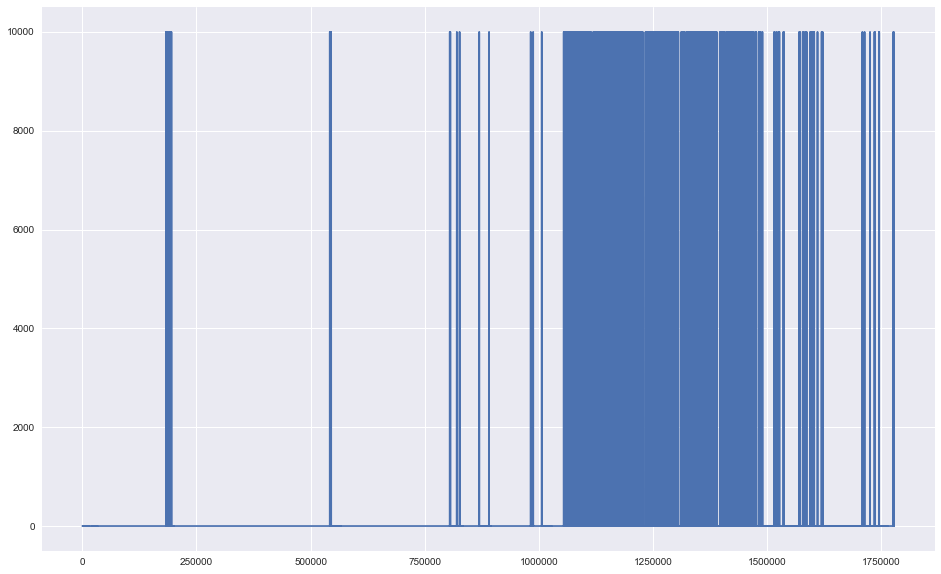

In [208]:
sns.set()
plt.figure(figsize=(16, 10))

plt.plot(tb_129['WEIGHT_VALUE'])
plt.show()

In [215]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

X = tb_129
X = StandardScaler().fit_transform(X)

# clf = IsolationForest(max_samples=100, random_state=rng)
# clf.fit(X)

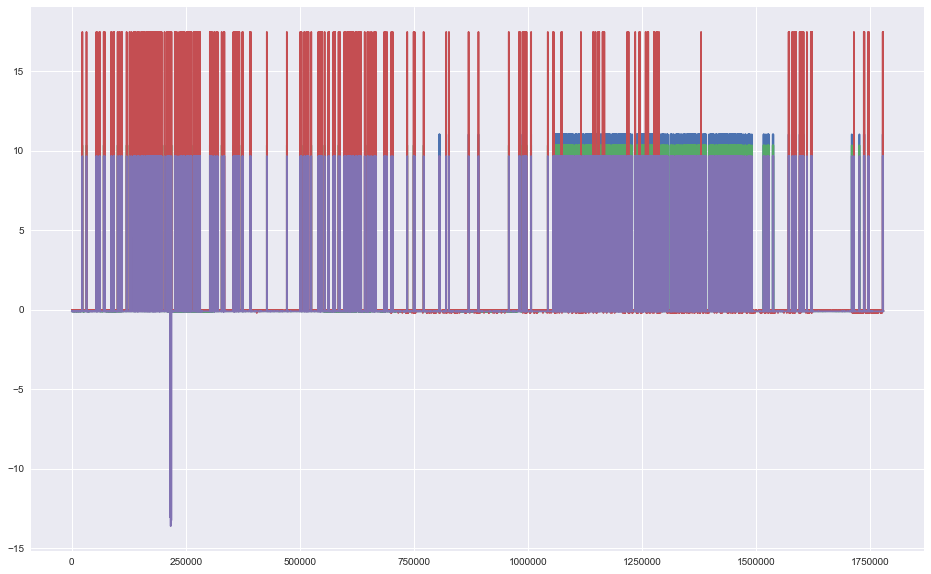

In [225]:
sns.set()
plt.figure(figsize=(16, 10))

plt.plot(X)
plt.show()